# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Lucio Aurey Feliciano
- **Email:** ciofeliciano0804@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Jam berapa puncak penggunaan sepeda terjadi dalam sehari?
- Apakah ada cuaca tertentu yang secara signifikan menurunkan jumlah penyewaan?
- Pada musim apakah sepeda paling banyak disewakan?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [24]:
day_df  = pd.read_csv("Data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
hour_df = pd.read_csv("Data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai Tabel day_df

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kesalahan Tipe Data Variabel dteday yang seharusnya adalah datetime

#### Menilai Tabel hour_df

In [30]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [31]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kesalahan Tipe Data Variabel dteday yang seharusnya adalah datetime

### Cleaning Data

#### Membersihkan Tabel day_df

In [34]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengganti Tipe Data Variabel dteday menjadi datetime

#### Membersihkan Tabel hour_df

In [36]:
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengganti Tipe Data Variabel dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pengelompokkan Rata-Rata Penyewaan Sepeda per jamnya

In [38]:
bike_rented_hour = hour_df.groupby(by="hr")["cnt"].sum().reset_index()

# Manual Grouping
bins = [0, 6, 12, 18, 23]
labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
bike_rented_hour['Kategori Waktu'] = pd.cut(bike_rented_hour['hr'], bins=bins, labels=labels, include_lowest=True)
bike_rented_hour.head()

,hr,cnt,Kategori Waktu
0,0,39130,Dini Hari
1,1,24164,Dini Hari
2,2,16352,Dini Hari
3,3,8174,Dini Hari
4,4,4428,Dini Hari


**Insight:**
- Puncak Penyewaan berada di jam ke 17 atau pukul 5 sore dengan rata-rata 461 Sepeda disewakan

#### Pengelompokkan Rata-Rata Penyewaan Sepeda Berdasarkan Pengaruh Cuaca

In [39]:
bike_rented_weather = hour_df.groupby(by="weathersit")["cnt"].mean().reset_index()
bike_rented_weather.head()

,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


**Insight:**
- Cuaca jelas sangatlah berdampak pada penyewaan sepeda 

#### Pengelompokkan Penyewaan Sepeda Berdasarkan Musim

In [40]:
bike_rented_season = day_df.groupby('season')['cnt'].mean().reset_index()
bike_rented_season.head()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


## Visualization & Explanatory Analysis

### Pertanyaan 1:

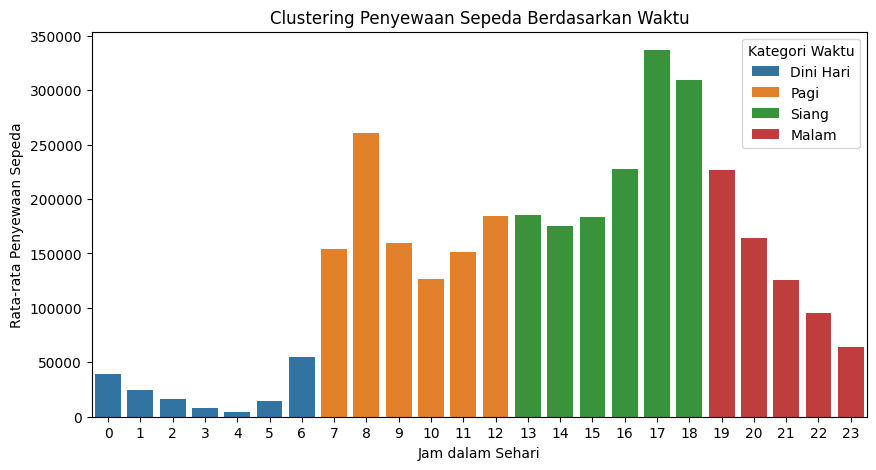

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hr', y='cnt', hue='Kategori Waktu', data=bike_rented_hour)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Clustering Penyewaan Sepeda Berdasarkan Waktu')
plt.legend(title='Kategori Waktu')
plt.show()

### Pertanyaan 2:

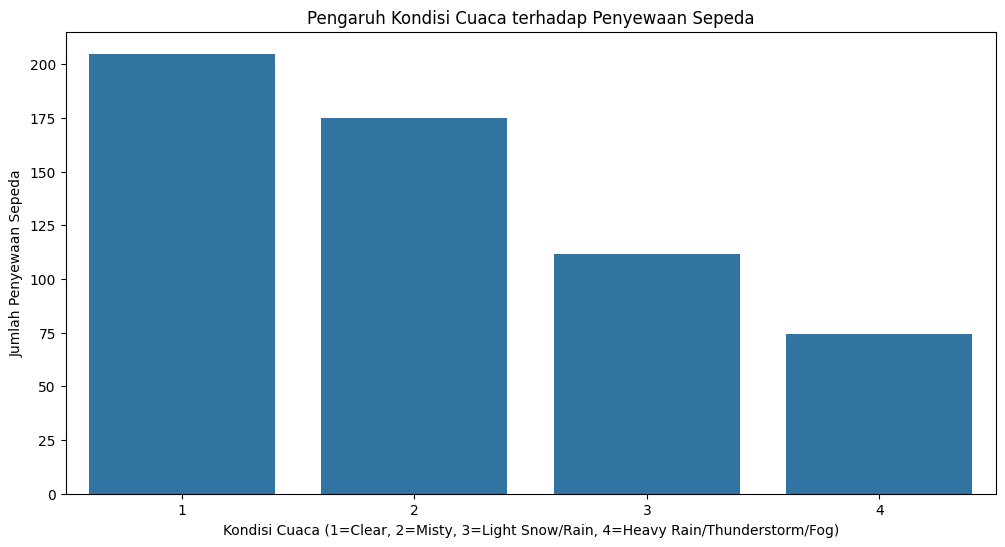

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bike_rented_weather, x='weathersit', y='cnt')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Misty, 3=Light Snow/Rain, 4=Heavy Rain/Thunderstorm/Fog)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.show()

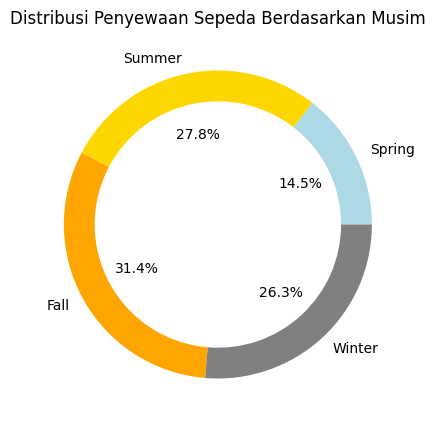

In [44]:
labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(8, 5))
plt.pie(bike_rented_season['cnt'], labels=labels, autopct='%1.1f%%', colors=['lightblue', 'gold', 'orange', 'gray'], wedgeprops = {'width': 0.2})
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.show()

**Insight:**
- Pertanyaan 1:Penyewaan sepeda mencapai puncaknya pada jam 08:00 pagi (jam sibuk pagi) dan 18:00 sore (jam sibuk pulang kerja).
               Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi untuk pergi dan pulang kerja/sekolah.
- Pertanyaan 2:Penyewaan sepeda mencapai puncaknya pada jam 08:00 pagi (jam sibuk pagi) dan 18:00 sore (jam sibuk pulang kerja).
               Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi untuk pergi dan pulang kerja/sekolah.
- Pertnyaan 4:Musim Gugur memiliki tingkat penyewaan tertinggi,mungkin karna cuaca yang sejuk mendukung penggunaan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:Optimalisasi layanan pada jam sibuk (08:00 dan 18:00) dengan menambah jumlah sepeda di lokasi strategis.
- Conclution pertanyaan 2:Penyesuaian promosi pada saat cuaca buruk untuk meningkatkan penyewaan.
- Conclution Pertanyaan 4:Optimalisasi Ketersediaan Sepeda Pada Musim Gugur